# Segment customers of an e-commerce site

## Goals :

- Customer segmentation
- The frequency with which the segmentation should be updated
- The code provided must respect the PEP8 convention

## 1. Shape analysis :

### importing libraries

In [269]:
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
from matplotlib import style
import seaborn as sns # for plotting graphs
sns.set(style="ticks")
import datetime as dt
from sklearn.datasets import make_blobs

In [270]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 99)

### loading data

In [271]:
df_customers = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_customers_dataset.csv", sep = ",")

In [272]:
df_customers.shape

(99441, 5)

In [273]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [274]:
df_geolocation = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_geolocation_dataset.csv", sep=",")

In [275]:
df_geolocation.shape

(1000163, 5)

In [276]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [277]:
df_order_items = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_order_items_dataset.csv", sep = ",")

In [278]:
df_order_items.shape

(112650, 7)

In [279]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [280]:
df_order_payments = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_order_payments_dataset.csv", sep=",")

In [281]:
df_order_payments.shape

(103886, 5)

In [282]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [283]:
df_orders = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_orders_dataset.csv", sep = ",")

In [284]:
df_orders.shape

(99441, 8)

In [285]:
df_orders.head() 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [286]:
df_products = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_products_dataset.csv", sep=",")

In [287]:
df_products.shape

(32951, 9)

In [288]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [289]:
df_orders.shape, df_customers.shape

((99441, 8), (99441, 5))

In [290]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [291]:
# Filtre sur les clients uniques qui ont deux customer_id différents
df_customers[df_customers.duplicated(subset="customer_unique_id" ,keep = False)].sort_values("customer_unique_id")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
72451,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL
...,...,...,...,...,...
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
27992,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
64323,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640,extrema,MG


### join dataframes

In [292]:
# join df_customers et df_orders
df_orders_customers = df_orders.join(df_customers.set_index('customer_id'), on='customer_id')
df_orders_customers.shape

(99441, 12)

In [293]:
df_orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [294]:
# join df_orders_customers et df_order_items
df_orders_customers_order_items = df_orders_customers.join(df_order_items.set_index('order_id'), on='order_id')
df_orders_customers_order_items.shape

(113425, 18)

In [295]:
df_orders_customers_order_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [296]:
# join df_orders_customers_order_items et df_products
df_orders_customers_order_items_products = df_orders_customers_order_items.join(df_products.set_index('product_id'), on='product_id')
df_orders_customers_order_items_products.shape

(113425, 26)

In [297]:
df_orders_customers_order_items_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [298]:
# join df_orders_customers_order_items_products et df_order_payments
df_orders_customers_order_items_products_order_payments = df_orders_customers_order_items_products.join(df_order_payments.set_index('order_id'), on='order_id')
df = df_orders_customers_order_items_products_order_payments
df.shape

(118434, 30)

In [299]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12


In [300]:
df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,1.0,credit_card,3.0,195.00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,1.0,credit_card,5.0,271.01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,1.0,credit_card,4.0,441.16
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,1.0,credit_card,4.0,441.16
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018-03-15 10:55:42,68.50,18.36,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0,1.0,debit_card,1.0,86.86


In [301]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

In [302]:
# éliminer les colonnes que nous n'utiliserons pas
df = df.drop(['product_name_lenght', 'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1)
df.shape

(118434, 25)

In [303]:
df.dtypes.value_counts()

object     16
float64     8
int64       1
dtype: int64

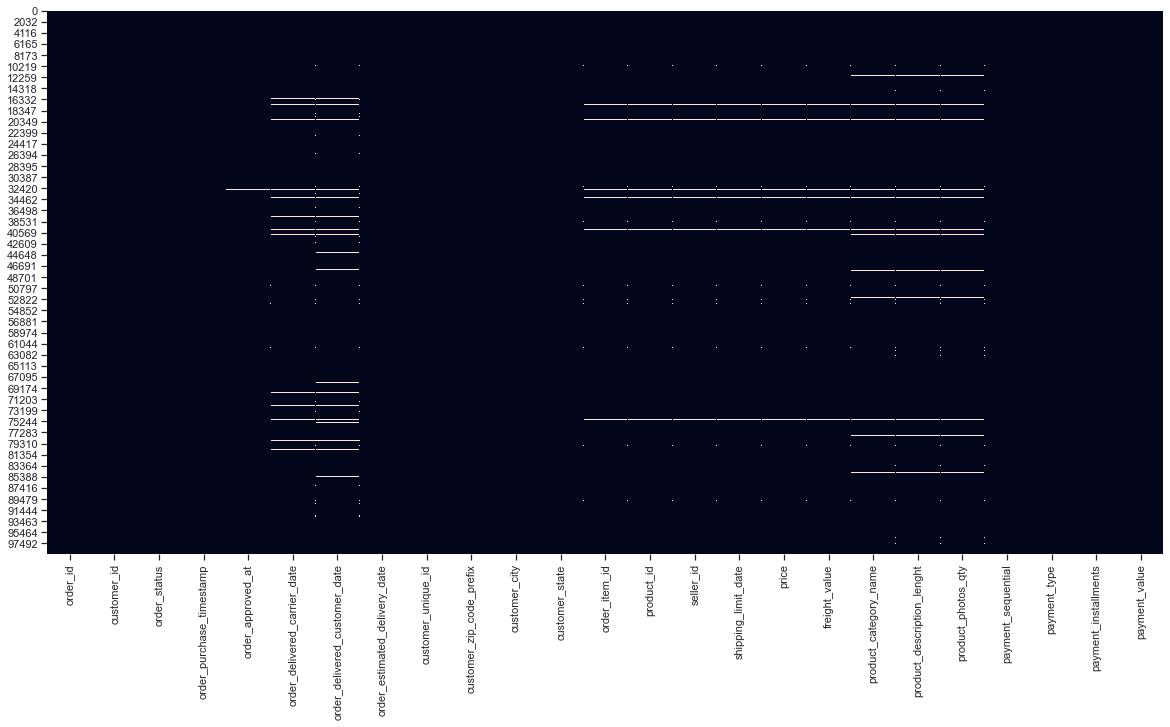

In [304]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(), cbar = False)

In [305]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
payment_type                     0.000025
payment_sequential               0.000025
payment_installments             0.000025
payment_value                    0.000025
order_approved_at                0.001486
product_id                       0.007008
seller_id                        0.007008
shipping_limit_date              0.007008
price                            0.007008
freight_value                    0.007008
order_item_id                    0.007008
order_delivered_carrier_date     0.017512
product_category_name            0.021345
product_description_lenght       0.021345
product_photos_qty               0

## 2. Background analysis :

In [306]:
df.shape

(118434, 25)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 99440
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   customer_unique_id             118434 non-null  object 
 9   customer_zip_code_prefix       118434 non-null  int64  
 10  customer_city                  118434 non-null  object 
 11  customer_state                 118434 non-null  object 
 12  order_item_id                  

In [308]:
df.describe(include = "all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value
count,118434,118434,118434,118434,118258,116360,115037,118434,118434,118434.000000,118434,118434,117604.000000,117604,117604,117604,117604.000000,117604.000000,115906,115906.000000,115906.000000,118431.000000,118431,118431.000000,118431.000000
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,NaN,5,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,credit_card,NaN,NaN
freq,63,63,115038,63,63,63,63,656,75,NaN,18738,49967,NaN,536,2133,63,NaN,NaN,11823,NaN,NaN,NaN,87286,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35034.264392,NaN,NaN,1.195920,NaN,NaN,NaN,120.822849,20.045551,NaN,786.957302,2.207849,1.094207,NaN,2.937398,172.849395
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29819.290218,NaN,NaN,0.697721,NaN,NaN,NaN,184.477367,15.861351,NaN,653.029009,1.719519,0.728290,NaN,2.774164,268.259831
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,4.000000,1.000000,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11310.000000,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,347.000000,1.000000,1.000000,NaN,1.000000,60.860000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24240.000000,NaN,NaN,1.000000,NaN,NaN,NaN,74.900000,16.290000,NaN,601.000000,1.000000,1.000000,NaN,2.000000,108.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58464.500000,NaN,NaN,1.000000,NaN,NaN,NaN,134.900000,21.190000,NaN,985.000000,3.000000,1.000000,NaN,4.000000,189.245000


In [309]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

### engineering new/essential columns

In [310]:
# engineering new/essential columns
df['delivery_against_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Changing the month attribute for correct ordenation
df['month_year'] = df['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['month_year'] = df['order_purchase_year'].astype(str) + '-' + df['month_year'].astype(str)

#creating year month column
df['month_y'] = df['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [311]:
df.shape

(118434, 34)

In [312]:
df.describe(include="all") 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y
count,118434,118434,118434,118434,118258,116360,115037,118434,118434,118434.000000,118434,118434,117604.000000,117604,117604,117604,117604.000000,117604.000000,115906,115906.000000,115906.000000,118431.000000,118431,118431.000000,118431.000000,115037.000000,118434.000000,118434.000000,118434.000000,118434.00000,118434,118434,118434,118434.000000
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,12,25,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,credit_card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mon,Aug,2017-11,NaN
freq,63,63,115038,63,63,63,63,656,75,NaN,18738,49967,NaN,536,2133,63,NaN,NaN,11823,NaN,NaN,NaN,87286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19262,12745,9111,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35034.264392,NaN,NaN,1.195920,NaN,NaN,NaN,120.822849,20.045551,NaN,786.957302,2.207849,1.094207,NaN,2.937398,172.849395,11.042073,2017.536324,6.033723,2.745056,14.75605,NaN,NaN,NaN,201759.666126
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29819.290218,NaN,NaN,0.697721,NaN,NaN,NaN,184.477367,15.861351,NaN,653.029009,1.719519,0.728290,NaN,2.774164,268.259831,10.165136,0.505492,3.231805,1.960629,5.32724,NaN,NaN,NaN,48.843291
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,4.000000,1.000000,1.000000,NaN,0.000000,0.000000,-189.000000,2016.000000,1.000000,0.000000,0.00000,NaN,NaN,NaN,201609.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11310.000000,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,347.000000,1.000000,1.000000,NaN,1.000000,60.860000,6.000000,2017.000000,3.000000,1.000000,11.00000,NaN,NaN,NaN,201709.000000


In [313]:
# displaying missing value counts and corresponding percentage against total observations
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis = 1, keys = ['Values', 'Percentage']).transpose()

,order_delivered_customer_date,delivery_against_estimated,product_photos_qty,product_category_name,product_description_lenght,order_delivered_carrier_date,price,order_item_id,product_id,seller_id,shipping_limit_date,freight_value,order_approved_at,payment_type,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_estimated_delivery_date,order_purchase_timestamp,order_status,customer_id,customer_unique_id,month_y,customer_city,customer_state,month_year,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,order_id
Values,3397.000000,3397.000000,2528.000000,2528.000000,2528.000000,2074.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,176.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,2.868264,2.868264,2.134522,2.134522,2.134522,1.751186,0.700812,0.700812,0.700812,0.700812,0.700812,0.700812,0.148606,0.002533,0.002533,0.002533,0.002533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
# dropping missing values
df.dropna(inplace=True)
df.isnull().values.any()

False

In [315]:
df.shape

(113391, 34)

In [316]:
# displaying dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113391 entries, 0 to 99440
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113391 non-null  object        
 1   customer_id                    113391 non-null  object        
 2   order_status                   113391 non-null  object        
 3   order_purchase_timestamp       113391 non-null  datetime64[ns]
 4   order_approved_at              113391 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113391 non-null  datetime64[ns]
 6   order_delivered_customer_date  113391 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113391 non-null  datetime64[ns]
 8   customer_unique_id             113391 non-null  object        
 9   customer_zip_code_prefix       113391 non-null  int64         
 10  customer_city                  113391 non-null  object        
 11  c

In [317]:
# excluding incomplete 2016 data and displaying first 3 rows of master dataframe
df = df.query("month_year != '2016-12' and month_year != '2016-10' and month_year != '2016-09'")
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,268.0,4.0,1.0,credit_card,1.0,18.12,7.0,2017,10,0,10,Mon,Oct,2017-10,201710
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,268.0,4.0,3.0,voucher,1.0,2.00,7.0,2017,10,0,10,Mon,Oct,2017-10,201710
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,268.0,4.0,2.0,voucher,1.0,18.59,7.0,2017,10,0,10,Mon,Oct,2017-10,201710


In [318]:
df.shape

(113056, 34)

In [319]:
df.dtypes.value_counts()

object            13
float64            9
datetime64[ns]     6
int64              6
dtype: int64

### Monthly Revenue

In [320]:
# calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df_revenue = df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue

,month_year,payment_value
0,2017-01,174448.07
1,2017-02,313470.32
2,2017-03,496731.66
3,2017-04,444457.76
4,2017-05,687145.80
5,2017-06,577595.09
6,2017-07,711168.83
7,2017-08,835079.65
8,2017-09,985552.70
9,2017-10,972010.21


### Monthly Revenue Growth Rate

In [321]:
#calculating for monthly revenie growth rate
# using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['payment_value'].pct_change()

df_revenue

,month_year,payment_value,MonthlyGrowth
0,2017-01,174448.07,NaN
1,2017-02,313470.32,0.796926
2,2017-03,496731.66,0.584621
3,2017-04,444457.76,-0.105236
4,2017-05,687145.80,0.546032
5,2017-06,577595.09,-0.159429
6,2017-07,711168.83,0.231258
7,2017-08,835079.65,0.174235
8,2017-09,985552.70,0.180190
9,2017-10,972010.21,-0.013741


### Monthly Active Customers

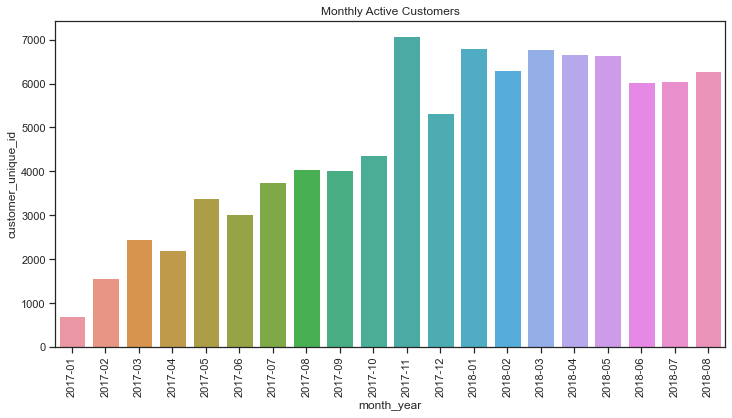

In [322]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_active = df.groupby('month_year')['customer_unique_id'].nunique().reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.set(palette = 'muted', color_codes = True, style = 'whitegrid')
sns.barplot(data = df_monthly_active, x = 'month_year', y = 'customer_unique_id')
ax.tick_params(axis = 'x', labelrotation = 90)

plt.title('Monthly Active Customers')
plt.show()

### Monthly Order Count

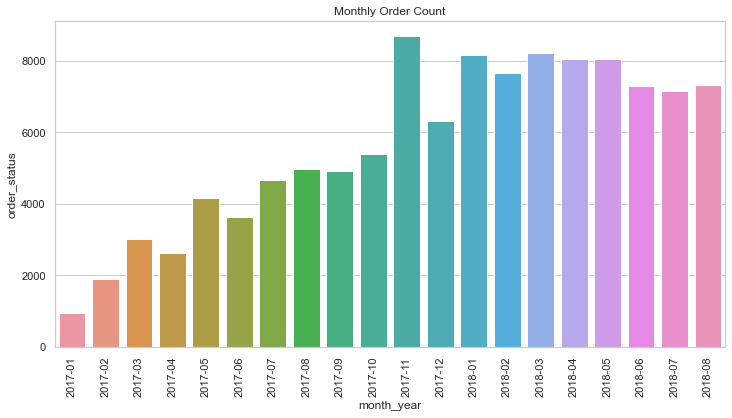

In [323]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_sales = df.groupby('month_year')['order_status'].count().reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.set(palette = 'muted', color_codes = True, style = 'whitegrid')
sns.barplot(data = df_monthly_sales, x = 'month_year', y = 'order_status')
ax.tick_params(axis ='x', labelrotation = 90)

plt.title('Monthly Order Count')
plt.show()

### Average Revenue per Customer Purchase

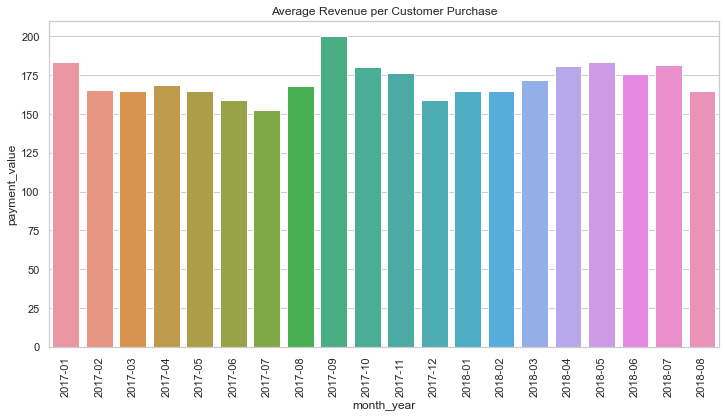

In [324]:
# create a new dataframe for average revenue by taking the mean of it
df_monthly_order_avg = df.groupby('month_year')['payment_value'].mean().reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.set(palette = 'muted', color_codes = True, style = 'whitegrid')
sns.barplot(data = df_monthly_order_avg, x = 'month_year', y = 'payment_value')
ax.tick_params(axis = 'x', labelrotation = 90)

plt.title('Average Revenue per Customer Purchase')
plt.show()

### New Customer Ratio

In [325]:
# create a dataframe contaning CustomerID and first purchase date
df_min_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.min().reset_index()
df_min_purchase.columns = ['customer_unique_id','minpurchasedate']
df_min_purchase['minpurchasedate'] = df_min_purchase['minpurchasedate'].map(lambda date: 100*date.year + date.month)

# merge first purchase date column to our main dataframe (tx_uk)
df = pd.merge(df, df_min_purchase, on='customer_unique_id')

In [326]:
# create a column called User Type and assign Existing 
# if User's First Purchase Year Month before the selected Invoice Year Month
df['usertype'] = 'New'
df.loc[df['month_y'] > df['minpurchasedate'],'usertype'] = 'Existing'

# calculate the Revenue per month for each user type
df_user_type_revenue = df.groupby(['month_y','usertype', 'month_year'])['payment_value'].sum().reset_index()

df_user_type_revenue

,month_y,usertype,month_year,payment_value
0,201701,New,2017-01,174448.07
1,201702,Existing,2017-02,111.07
2,201702,New,2017-02,313359.25
3,201703,Existing,2017-03,596.38
4,201703,New,2017-03,496135.28
5,201704,Existing,2017-04,2677.76
6,201704,New,2017-04,441780.00
7,201705,Existing,2017-05,6672.94
8,201705,New,2017-05,680472.86
9,201706,Existing,2017-06,6907.89


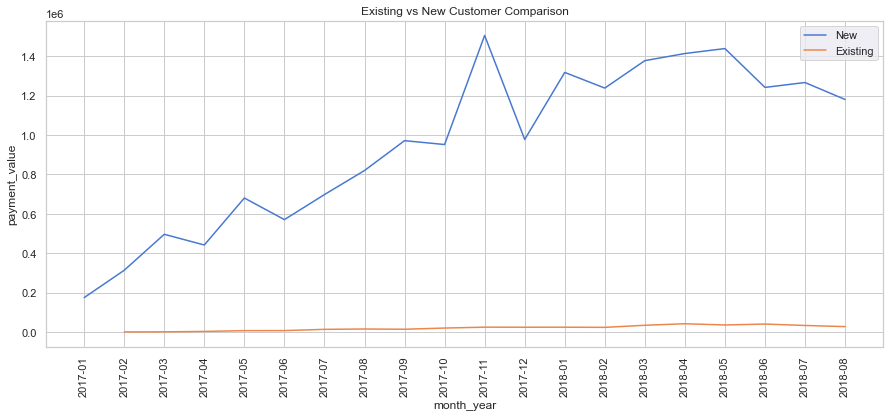

In [327]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.set(palette = 'muted', color_codes = True)

ax = sns.lineplot(x = 'month_year', y = 'payment_value', data = df_user_type_revenue.query("usertype == 'New'"), label ='New')
ax = sns.lineplot(x ='month_year', y ='payment_value', data = df_user_type_revenue.query("usertype == 'Existing'"), label ='Existing')
ax.set_title('Existing vs New Customer Comparison')
ax.tick_params(axis ='x', labelrotation = 90)

plt.show()

### Top ten state by number of client

Text(0.5, 1.0, 'Top ten state by number of client')

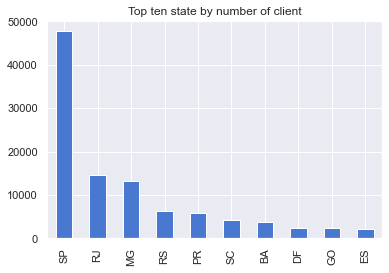

In [328]:
df.customer_state.value_counts()[:10].plot(kind = 'bar')
plt.title('Top ten state by number of client')

In [329]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_description_lenght',
       'product_photos_qty', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'delivery_against_estimated',
       'order_purchase_year', 'order_purchase_month',
       'order_purchase_dayofweek', 'order_purchase_hour', 'order_purchase_day',
       'order_purchase_mon', 'month_year', 'month_y', 'minpurchasedate',
       'usertype'],
      dtype='object')

In [330]:
df.to_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_dataset.csv", index = False)

In [331]:
df['order_purchase_timestamp'].min(), df['order_purchase_timestamp'].max()

(Timestamp('2017-01-05 11:56:06'), Timestamp('2018-08-29 15:00:37'))

In [332]:
PRESENT = dt.datetime(2018,10,18)
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

## 3. RFM Analysis

In [333]:
rfm = df[df["customer_unique_id"] == "7c396fd4830fd04220f754e42b4e5bff"].\
    groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda date: (PRESENT - date.max()).days,
                                             'order_id': lambda num: len(set(num)),
                                             'payment_value': lambda payment_value: payment_value.sum()})

In [334]:
len(["e481f51cbdc54678b7cc49136f2d6af7", "e481f51cbdc54678b7cc49136f2d6af7", "e481f51cbdc54678b7cc49136f2d6af7"])

3

In [335]:
set(["e481f51cbdc54678b7cc49136f2d6af7", "e481f51cbdc54678b7cc49136f2d6af7", "e481f51cbdc54678b7cc49136f2d6af7"])

{'e481f51cbdc54678b7cc49136f2d6af7'}

In [336]:
len(set(["e481f51cbdc54678b7cc49136f2d6af7", "e481f51cbdc54678b7cc49136f2d6af7", "e481f51cbdc54678b7cc49136f2d6af7"]))

1

In [337]:
rfm

,order_purchase_timestamp,order_id,payment_value
customer_unique_id,,,
7c396fd4830fd04220f754e42b4e5bff,380,2,82.82


In [338]:
# Version ou Frequency = Nombre d'items achetés 
rfm = df.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda date: (PRESENT - date.max()).days,
                                     'order_id': lambda num: len(num),
                                    'payment_value': lambda payment_value: payment_value.sum()})

# Version ou Frequency = Nombre d'orders effectuées 
# rfm= df.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda date: (PRESENT - date.max()).days,
#                                              'order_id': lambda num: len(set(num)),
#                                              'payment_value': lambda payment_value: payment_value.sum()})

In [339]:
# Change the name of columns
rfm.columns = ['monetary','frequency','recency']

In [340]:
rfm['recency'] = rfm['recency'].astype(int)

In [341]:
rfm.head()

,monetary,frequency,recency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27
0000f46a3911fa3c0805444483337064,586,1,86
0000f6ccb0745a6a4b88665a16c9f078,370,1,43
0004aac84e0df4da2b147fca70cf8255,337,1,196


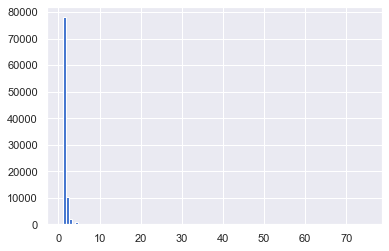

In [342]:
rfm["frequency"].hist(bins=100)

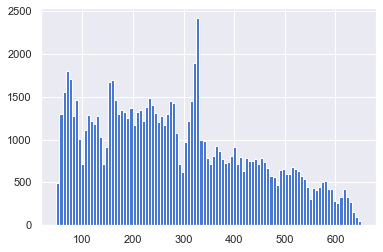

In [343]:
rfm["monetary"].hist(bins=100)

In [344]:
pd.cut(rfm['recency'], [0, 365, 730, 1460, 10000]).value_counts()

(0, 365]         81355
(365, 730]        6601
(730, 1460]       2691
(1460, 10000]     1149
Name: recency, dtype: int64

In [345]:
rfm = rfm[rfm["recency"] < 365]

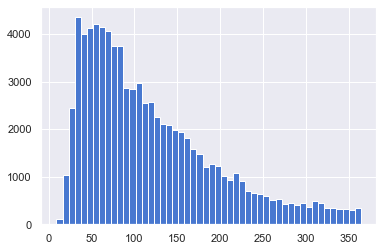

In [346]:
rfm["recency"].hist(bins = 50)

## Computing Quantile of RFM values

In [347]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])
#rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['1'], duplicates ='drop')
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [348]:
def split_by_frequency(frequency):
    if frequency == 1:
        return 1
    elif frequency > 1:
        return 2

In [349]:
rfm["f_split"] = rfm["frequency"].apply(split_by_frequency)

In [350]:
rfm.head()

,monetary,frequency,recency,r_quartile,m_quartile,f_split
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141,2,4,1
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27,4,3,1
0000f46a3911fa3c0805444483337064,586,1,86,3,1,1
0000f6ccb0745a6a4b88665a16c9f078,370,1,43,4,2,1
0004aac84e0df4da2b147fca70cf8255,337,1,196,1,2,1


In [351]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str) + rfm.f_split.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,r_quartile,m_quartile,f_split,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141,2,4,1,214
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27,4,3,1,413
0000f46a3911fa3c0805444483337064,586,1,86,3,1,1,311
0000f6ccb0745a6a4b88665a16c9f078,370,1,43,4,2,1,412
0004aac84e0df4da2b147fca70cf8255,337,1,196,1,2,1,112


In [352]:
rfm.to_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_rfm.csv", index = True)

### Filter out Top/Best cusotmers

In [366]:
rfm[rfm['RFM_Score'] == '424'].sort_values('monetary', ascending = False)

,monetary,frequency,recency,r_quartile,m_quartile,f_split,RFM_Score
customer_unique_id,,,,,,,
a13c26a61fc7db6598f3bb1849921348,162,2,45,4,4,2,424
cf4fa55f22af926c5ae29864635892c8,162,2,44,4,4,2,424
3a2d6a780f9229755e1da6f1e320fa08,161,5,34,4,4,2,424
15875d882071e975e052f90df487ec0f,160,2,37,4,4,2,424
f5136b8fc0ca2d9037d400ec1f196305,159,2,40,4,4,2,424
...,...,...,...,...,...,...,...
3d4f12dece1264e5d6321f1b7f003336,54,2,58,4,4,2,424
317cfc692e3f86c45c95697c61c853a6,53,2,9,4,4,2,424
ebd16156e915376664512033f080f70d,51,2,56,4,4,2,424


### Customers who's recency value is low

In [367]:
rfm[rfm['r_quartile'] <= '2'].sort_values('monetary', ascending = False)

,monetary,frequency,recency,r_quartile,m_quartile,f_split,RFM_Score
customer_unique_id,,,,,,,
29a63a400c3ca9982907ce8de1f19527,650,1,19,4,1,1,411
edd1864079b2d69900cbf5c2bcb931c7,650,1,18,4,1,1,411
f7b981e8a280e455ac3cbe0d5d171bd1,650,1,19,4,1,1,411
728e4a7d0db4845270091ded0923c71f,650,3,46,4,1,2,421
f7be9bec658c62ab6240b44cd26c0b84,650,2,38,4,1,2,421
...,...,...,...,...,...,...,...
7a22d14aa3c3599238509ddca4b93b01,49,1,73,3,4,1,314
b4dcade04bc548b7e3b0243c801f8c26,49,1,106,2,4,1,214
b701bebbdf478f5500348f03aff62121,49,1,33,4,4,1,414


### Customers who's recency, frequency as well as monetary values are low 

In [368]:
rfm[rfm['RFM_Score'] == '111'].sort_values('recency',ascending = False)

,monetary,frequency,recency,r_quartile,m_quartile,f_split,RFM_Score
customer_unique_id,,,,,,,
0055b522bc89cbfbf376d8b59a628470,593,1,364,1,1,1,111
6140e284b4e76e928d4cefbf30df1e01,443,1,364,1,1,1,111
77b10b35bfbd93f66791b7be53346370,404,1,364,1,1,1,111
e5edefaa70dfff0289958322e51257e1,573,1,363,1,1,1,111
13b588da91760a6e28ec9e0e1a2b414e,624,1,363,1,1,1,111
...,...,...,...,...,...,...,...
d2428b14bf5a7f99f1612597f141aa7c,575,1,163,1,1,1,111
2d536d8840d1835db262f21d094b78d6,417,1,163,1,1,1,111
964930a4e1594ded5016809e48fa105c,615,1,163,1,1,1,111


### Customers with high frequency value

In [370]:
rfm[rfm['f_split'] > 1].sort_values('monetary', ascending = False)

,monetary,frequency,recency,r_quartile,m_quartile,f_split,RFM_Score
customer_unique_id,,,,,,,
12f5d6e1cbf93dafd9dcc19095df0b3d,650,6,110,2,1,2,221
728e4a7d0db4845270091ded0923c71f,650,3,46,4,1,2,421
d753459418d268407f19b64be28e3c5a,650,2,38,4,1,2,421
f7be9bec658c62ab6240b44cd26c0b84,650,2,38,4,1,2,421
6222ef69df52b4ed71be551725551cc0,650,3,56,4,1,2,421
...,...,...,...,...,...,...,...
e0836a97eaae86ac4adc26fbb334a527,51,3,88,3,4,2,324
149408087e7c2a2c349f11a171b53dba,51,3,219,1,4,2,124
bb5d40ed8c3448238563262b4700bae5,50,3,58,4,4,2,424


## RFM variables 

### Boxplot

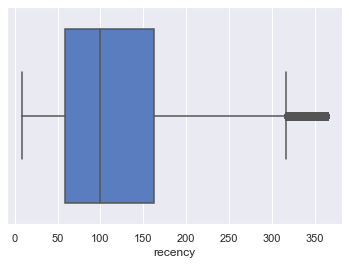

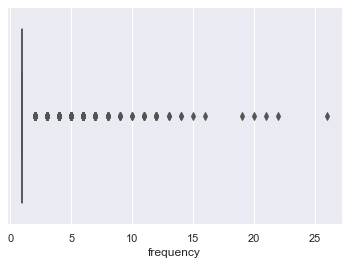

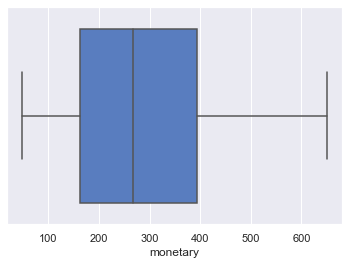

In [357]:
# Boxplot
for col in rfm[['recency', 'frequency', 'monetary']]:
                plt.figure()
                sns.boxplot(x = rfm[col])

In [358]:
# there are no outliers

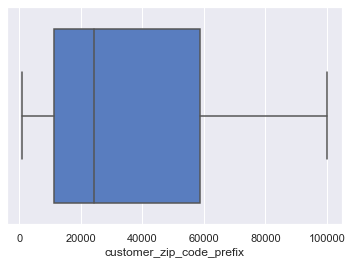

In [359]:
plt.figure()
sns.boxplot(x = df["customer_zip_code_prefix"])

### Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


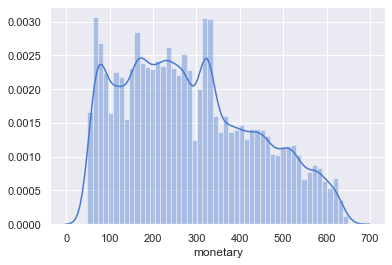

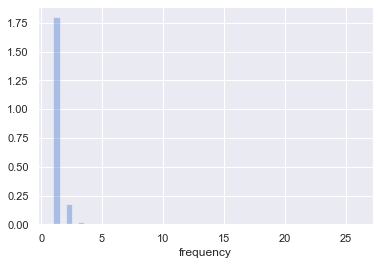

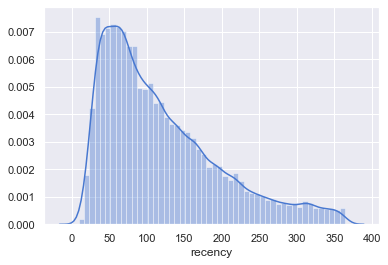

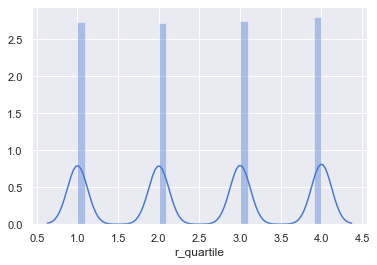

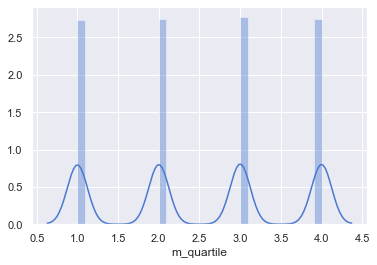

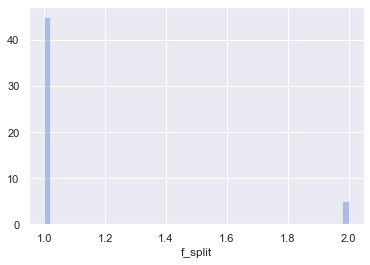

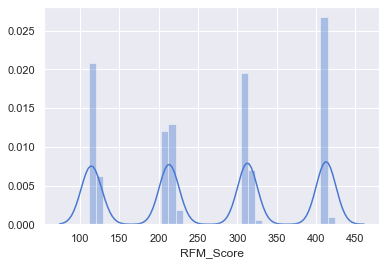

In [360]:
for col in rfm: 
                plt.figure()
                sns.distplot(rfm[col])

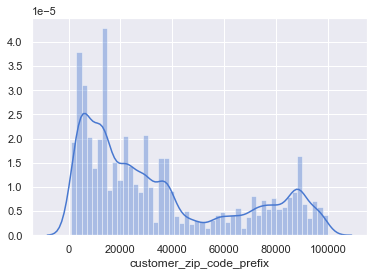

In [361]:
plt.figure()
sns.distplot(df["customer_zip_code_prefix"])

In [362]:
df_num = rfm[['monetary', 'recency', 'frequency']]

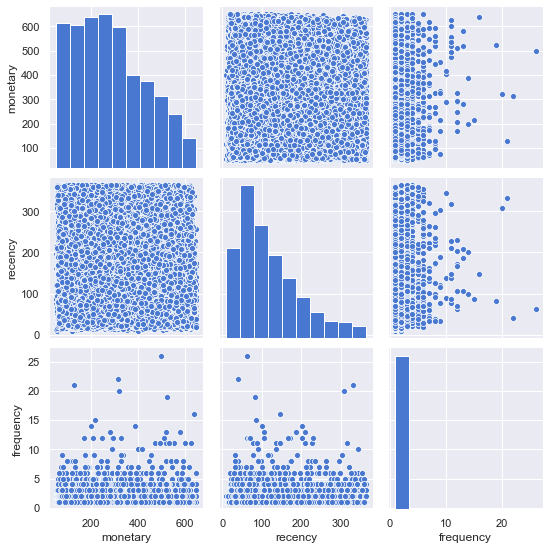

In [364]:
# graph - pairwise crossing of variables
sns.pairplot(df_num)